# Ejercicio 12

Encontrar los polinomios de cuadrados mínimos de grados $1, 2, 3$ y $4$ para los siguientes datos.

|       |     |         |         |         |         |         |
|-------|-----|---------|---------|---------|---------|---------|
| $x_i$ | $0$ | $0.15$  | $0.31$  | $0.5$   | $0.6$   | $0.75$  |
| $y_i$ | $1$ | $1.004$ | $1.031$ | $1.117$ | $1.223$ | $1.422$ |

¿Cuál grado obtiene la mejor aproximación de cuadrados mínimos (es decir, la de menor error)?

Sea $A^{(k)} \in \mathbb{R}^{6xk}$ la matriz asociada al problema de cuadrados mínimos para encontrar el polinomio de grado $k \in \{1,2,3,4\}$ que mejor aproxime las observaciones $b \in \mathbb{R}^{6x1}$.

$$
A^{(k)}
= \begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^k \\
\vdots & & & & \vdots \\
1 & x_6 & x_6^2 & \dots & x_6^k \\
\end{bmatrix}
\hspace{2em}
x = \begin{bmatrix}
0 \\
0.15 \\
0.31 \\
0.5 \\
0.6 \\
0.75
\end{bmatrix}
\hspace{2em}
b = \begin{bmatrix}
1 \\
1.004 \\
1.031 \\
1.117 \\
1.223 \\
1.422
\end{bmatrix}
$$

Para cada grado $k$ vamos a resolver las ecuaciones normales para encontrar los coeficientes $(\alpha_1, \dots, \alpha_k)$ del polinomio $p_k$.

$$
(A^{(k)})^t A^{(k)} (\alpha_1, \dots, \alpha_k) = (A^{(k)})^t b
$$

Luego vamos a ver qué grado mejor aproxima los datos calculando el error de cada polinomio.

$$
\text{error}_k = \sum_{i=1}^6 (p_k(x_i) - y_i)^2
$$

In [78]:
import numpy as np

def eval_poly(coefs, x):
    return sum([c * x**i for i, c in enumerate(coefs)])

x = np.array([0, 0.15, 0.31, 0.5, 0.6, 0.75])
y = np.array([1, 1.004, 1.031, 1.117, 1.223, 1.422])

coefs = []
errors = []
for k in range(1,5):
    A = np.array([
        [xi**i for i in range(0, k+1)]
        for xi in x
    ])
    c = np.linalg.solve(A.T @ A, A.T @ y)
    coefs.append(c)

    e = sum((eval_poly(c, x) - y)**2)
    errors.append(e)

best_poly = np.argmin(errors)
print(f"El polinomio que mejor aproxima los datos es el de grado = {best_poly+1} con un error = {errors[best_poly]}")

El polinomio que mejor aproxima los datos es el de grado = 4 con un error = 8.608092201306578e-05


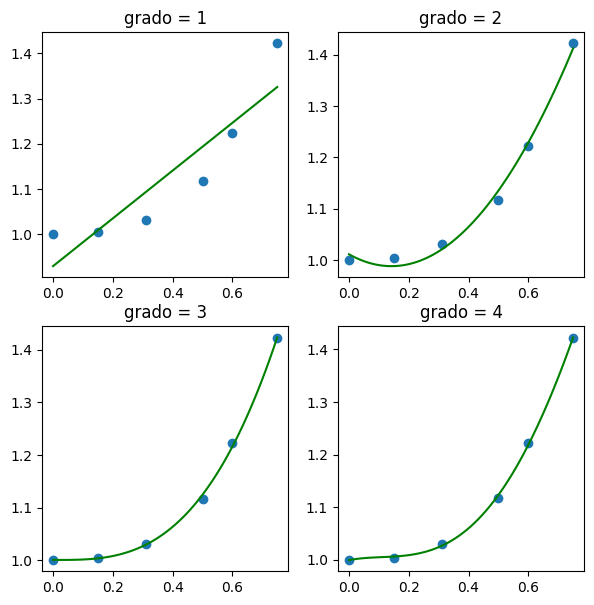

In [85]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2, figsize=(7,7))

for idx, c in enumerate(coefs):
    ax = axis[idx // 2, idx % 2]
    ax.scatter(x=x, y=y)
    fx = np.linspace(x.min(), x.max(), len(x)*10)
    fy = [eval_poly(c, x) for x in fx]
    ax.plot(fx, fy, c="green")
    ax.set_title(f"grado = {idx+1}")

plt.show()